# Network density

Without sentiments, agents tend to always meet the same neighbour. That means, that the network of opinion exchanges (actual interaction) has to be much more sparse than the original network, and even the interaction network in the case of higher sentiments. Show it with data in this notebook. The relative density is calculated not as the share of total possible edges (as in the case of a complete graph), but as the share in edges that agents could possibly interact on. We count edges towards that share if agents at any point in time choose to interact through it.

The figure that is created here appears as the right panel of figure 8 in the paper.

In [1]:
import numpy as np
import os
import networkx as nx

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)

sns.set_style('whitegrid')

Path

In [2]:
parent_path = os.path.join(os.getcwd(), "figures")

path = os.path.join(os.getcwd(), "figures\\meetingsdata")

if not os.path.exists(parent_path):
    os.mkdir(parent_path)
if not os.path.exists(path):
    os.mkdir(path)

In [3]:
values = dict(enumerate(['10', '50', '90']))
values_theta= dict(enumerate(['10', '30', '90']))

Store data on the number of components and the density of the networks in arrays, to see how it behaves as parameter values vary.

create array to store all meeting frequency numbers
* dimension 1: theta (3 values)
* dimension 2: kappa (3 values)
* dimension 3: sentiment/alpha (3 values)
* dimension 4: individual agents (300 agents)

In [4]:
density = np.full((3,3,3), np.nan)

In [5]:
sents = ['00','05'] + [str(i) for i in range(10, 96, 5)]

density = {sent: {i+1:list() for i in range(9)} for sent in sents}

for sent in sents:
    with open(f'M2/K1G1T1-A300T1000M50S{sent}-n8/stats_indv.txt', 'r') as f:
        G = nx.Graph()
        theta = 1
        for i, line in enumerate(f):
            # the two conditions below indicate that we have reached a new simulation run
            if line[:5] == 'Agent':
                if i > 0:
                    # store data of last graph
                    density[sent][theta].append(len(G.edges())/1200)
                    #communities[sent][theta].append(len(nxcom.greedy_modularity_communities(G, weight='weight')))
                    #components[sent][theta].append(nx.number_connected_components(G))
                    # update theta and clear the graph of all nodes and edges
                    theta += 1
                    if theta == 10:
                        theta = 1
                    del G
                    G = nx.Graph()
            else:
                ln = line.rstrip('\n').split()
                # zero interactions are recorded in those text files, filter them out
                if int(ln[2]) > 0:
                    G.add_edge(int(ln[0]), int(ln[1]), weight=int(ln[2]))
        # add the last treatment in the file
        density[sent][theta].append(len(G.edges())/1200)

In [6]:
dens_sent = {sent: list(density[sent].values()) for sent in sents}
#dens_sent = {sent: [x for l in dens_sent[sent] for x in l] for sent in sents}

In [7]:
# there are more values for 0 sentiment for some reason, so standard errors are kind of hard to compare
del density['00']

<IPython.core.display.Javascript object>


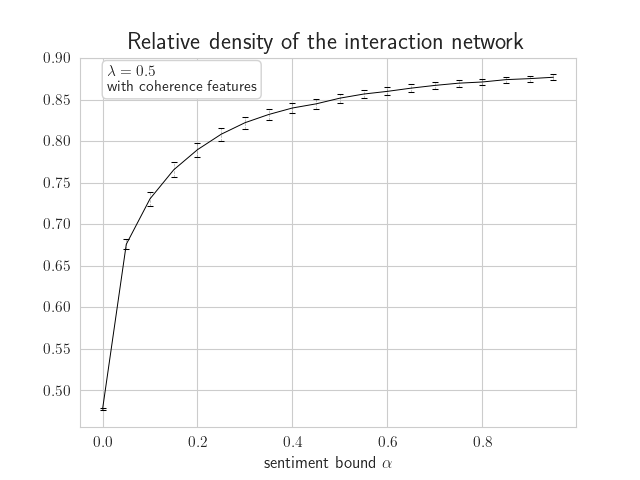

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
x = [int(sent)/100 for sent in dens_sent.keys()]
y = [np.mean(dens) for dens in dens_sent.values()]
y_erbar = [np.std(dens) / len(dens) for dens in dens_sent.values()]

plt.figure()
plt.title('\LARGE{Relative density of the interaction network}')
plt.xlabel('sentiment bound $\\alpha$', fontsize=12)

eb = plt.errorbar(x,y,y_erbar, c='black', linewidth=0.7, elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.86, '$\lambda=0.5$ \n with coherence features', bbox=props, fontsize=11)

ax = plt.gca()
ax.tick_params(axis='both', labelsize=11)

plt.savefig('figures/meetingsdata/rel_density_alpha.png')
plt.savefig('figures/meetingsdata/rel_density_alpha_cred.eps')